# Corporate Ownership Network


The following network describes the inter-relations between companies in the United States, by means of the ownership of one into another.


In [35]:
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import requests
from tqdm.notebook import tqdm
from zlib import adler32
import scipy.stats as st
import numpy as np
import chardet



# Reading the nodes file and creating a dictionary of node IDs and their names
nodes_dict = {}
with open('names.txt', 'r') as f:
    for line in f:
        parts = line.strip().split('\t')
        if len(parts) == 2:
            node_name, node_id = parts
            nodes_dict[int(node_id)] = node_name
        else:
            continue
            

# Reading the ownership file and creating a list of edges
edges_list = []
with open('ownership.txt', 'r') as f:
    for line in f:
        source, target = line.strip().split('\t')
        if int(source) in nodes_dict and int(target) in nodes_dict:
            source_name = nodes_dict[int(source)]
            target_name = nodes_dict[int(target)]
            edges_list.append((source_name, target_name))
        else:
            continue

# Creating a directed graph using the nodes and edges
G = nx.DiGraph()
G.add_nodes_from(nodes_dict.values())
G.add_edges_from(edges_list)

# Setting the node names as node attributes
nx.set_node_attributes(G, nodes_dict, 'name')

# Print the number of nodes and edges in the graph
print(f"Number of nodes: {len(G.nodes)}")
print(f"Number of edges: {len(G.edges)}")


Number of nodes: 8215
Number of edges: 6721


We read the input data extracted from Pajek Dataset; where 'names.txt' provides the names of the corporation and its corresponding node ID, and 'ownership.txt' gives us the information about the edges in the network, more specifically which coorporation is owned by another.


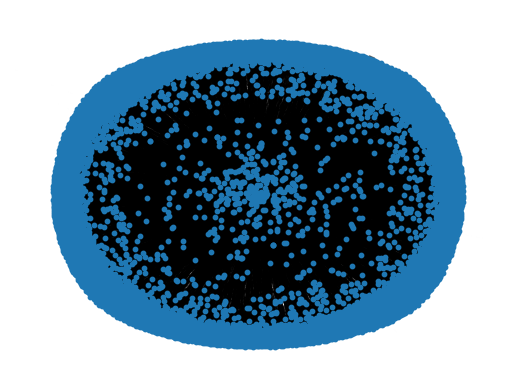

In [36]:


# Draw the graph without node labels
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels={}, font_size=12)
plt.axis('off')

plt.show()


In [ ]:
This code uses the spring_layout function from NetworkX to generate positions for the nodes in the graph.
It then uses the draw_networkx function to draw the graph with directed arrows.
The draw_networkx_labels function adds the node labels to the plot.
Finally, the show function is called to display the plot.

Since our graph is large, the visualisation is cluttered and hard to see.


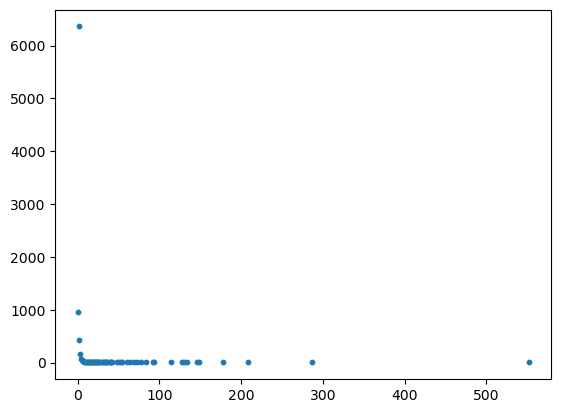

In [37]:
degree_hist = np.array(nx.degree_histogram(G))
idx = np.argwhere(degree_hist > 0)
plt.scatter(idx, degree_hist[idx], s=10, label='Degree Distribution')

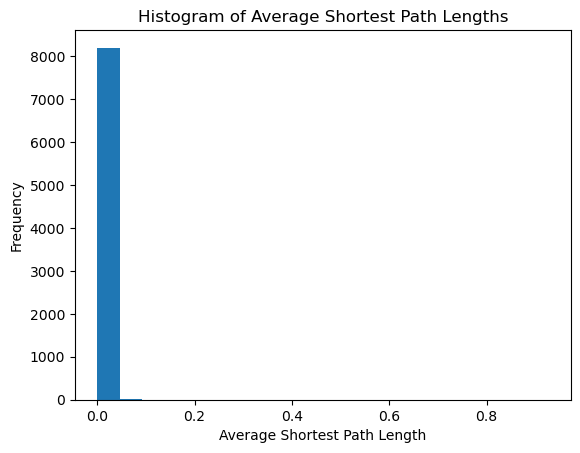

In [38]:
# Calculate the shortest path lengths between all pairs of nodes
shortest_path_lengths = dict(nx.shortest_path_length(G))

# Calculate the average shortest path length for each node
avg_shortest_path_lengths = []
for node in shortest_path_lengths:
    avg_shortest_path_lengths.append(sum(shortest_path_lengths[node].values()) / (len(G) - 1))

# Create a histogram of the average shortest path lengths
plt.hist(avg_shortest_path_lengths, bins=20)
plt.xlabel("Average Shortest Path Length")
plt.ylabel("Frequency")
plt.title("Histogram of Average Shortest Path Lengths")
plt.show()

In [ ]:
We use the shortest_path_length function to compute the shortest path lengths between all pairs of nodes in the graph.
Next, we calculate the average shortest path length for each node by taking the average of the shortest path lengths to 
all other nodes. We store these average shortest path lengths in a list called avg_shortest_path_lengths.
Finally, we use the hist function from the matplotlib library to create a histogram of the average shortest path lengths
with 20 bins. 
Note that our graph is not connected. We computed the shortest path lengths within each connected component of the graph, 
and the resulting histogram will only show the average shortest path lengths for the nodes in the largest connected component.


In [40]:
# Calculating the diameter and radius of the graph

# Finding the largest strongly connected component
scc = max(nx.strongly_connected_components(G), key=len)

diameter = nx.diameter(G.subgraph(scc))
radius = nx.radius(G.subgraph(scc))

print(f"The diameter of the graph is {diameter}")
print(f"The radius of the graph is {radius}")

The diameter of the graph is 3
The radius of the graph is 2


In [ ]:
We calculate the diameter and radius of a graph using the nx.diameter() and nx.radius() functions, respectively,from 
the networkx library.
In this code, we first create the directed graph using the add_nodes_from and add_edges_from functions as before.
Then we set the node names as node attributes using the set_node_attributes function.
Note that we computed the eccentricity only for the nodes that are reachable from all other nodes in the graph.
By finding the strongly connected components of the graph and computing the eccentricity for each node in the largest 
strongly connected component, in order to be able to get it.


Global clustering coefficient: 0.00011683417828599824
Average local clustering coefficient: 0.0033187090406071183


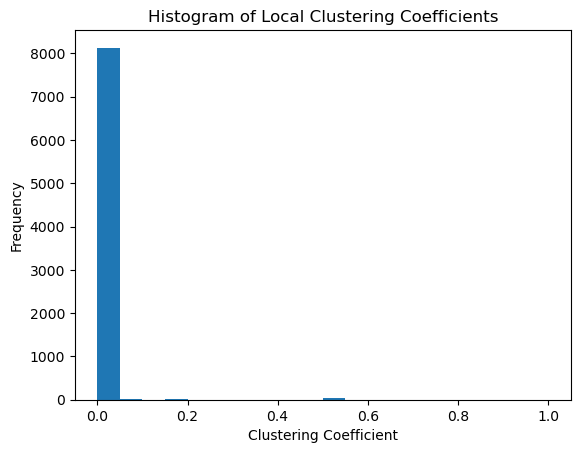

In [43]:
# Global clustering coefficient
global_cc = nx.transitivity(G)
print(f"Global clustering coefficient: {global_cc}")

# Average local clustering coefficient
avg_local_cc = nx.average_clustering(G)
print(f"Average local clustering coefficient: {avg_local_cc}")

# Histogram of local clustering coefficients
local_ccs = nx.clustering(G)
plt.hist(list(local_ccs.values()), bins=20)
plt.title("Histogram of Local Clustering Coefficients")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()


In [ ]:
We then use the nx.clustering() function to compute the clustering coefficient for each node in the graph.

We then use the nx.average_clustering() function to compute the global clustering coefficient for the entire graph.
We also calculate the average of the local clustering coefficients to obtain the average local clustering coefficient.

Finally, we create a histogram of the local clustering coefficients using the plt.hist() function.


In [50]:
# Compute the degree centrality
degree_centrality = nx.degree_centrality(G)
top_10_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print(f"top 10 degree centrality:")
print(top_10_degree_centrality)


# Compute the closeness centrality
closeness_centrality = nx.closeness_centrality(G)
top_10_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print(f"top 10 closeness centrality:")
print(top_10_closeness_centrality)


# Compute the betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_10_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print(f"top 10 betweenness centrality:")
print(top_10_betweenness_centrality)


# Compute the Katz centrality
katz_centrality = nx.katz_centrality(G)
top_10_katz_centrality = sorted(katz_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print(f"top 10 katz centrality:")
print(top_10_katz_centrality)


# Compute the eigenvector centrality

eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
top_10_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print(f"top 10 eigenvector centrality:")
print(top_10_eigenvector_centrality)


top 10 degree centrality:
[('Clear Channel Communications', 0.06720233747260775), ('Liberty Group Publishing', 0.03494034575115656), ('CNHI', 0.02544436328220112), ('News', 0.021670318967616266), ('CBS RADIO - Infinity Broadcasting', 0.018018018018018018), ('Lee Enterprises', 0.017774531288044803), ('Gannett', 0.016313610908205503), ('Disney', 0.01582663744825907), ('PRIMEDIA', 0.015461407353299246), ('Time Warner', 0.013878743608473338)]
top 10 closeness centrality:
[('OpenTV', 0.000917322098968862), ('TV Guide Magazine', 0.0008348116456224564), ('NextVenue', 0.0008013257307327498), ('Rhythms NetConnections', 0.0007895415288102093), ('Tickets.com', 0.0007791575359142927), ('Excite@Home', 0.0007622193286118081), ('Sprint Spectrum', 0.000762023284545807), ('OmniSky', 0.0007576734126813618), ('Static', 0.0007088605606478318), ('Time Warner Telecom', 0.0007014736744466474)]
top 10 betweenness centrality:
[('Liberty Media', 6.685533503597154e-05), ('AT&T', 4.996918097770076e-05), ('Cablevi

In [ ]:
Centralities 

We computed the degree, closeness, betweenness, Katz and eigenvector centralities for each node in the Graph, using the
corresponding functions from NetworkX.
And then we got the top 10 nodes of each kind.


In [55]:
# Compute the PageRank scores
page_rank = nx.pagerank(G)
# Get the top nodes based on their PageRank score
top_pagerank = sorted(page_rank, key=page_rank.get, reverse=True)[:10]
print("Top nodes based on PageRank:")
for node in top_pagerank:
    print(f"{node}: {page_rank[node]}")

# Compute the HITS scores
hits = nx.hits(G)
# Get the top nodes based on their authority score
top_authority = sorted(hits[1], key=hits[1].get, reverse=True)[:10]
print("Top nodes based on authority score:")
for node in top_authority:
    print(f"{node}: {hits[1][node]}")
    

Top nodes based on PageRank:
Quantum: 0.0004797592428925962
Logistics Firm: 0.00042683436834206455
NxTrend Technology: 0.00042145416260237924
Netlink: 0.0004007459855568672
Executive Conference: 0.00038551528838839233
Static: 0.00038529068658375653
E-Stamp: 0.00037930566408715
priceline.com: 0.00037530426145149725
Metreon: 0.00037422464437474235
Rare Medium Group: 0.00037334232570066265
Top nodes based on authority score:
WALC-FM (Charleston, South Carolina): 0.0018148512340054193
Radio One: 0.0018145635636222033
Katz Media Group: 0.0018145515885254408
KBKB-AM/FM (Fort Madison, Iowa): 0.0018112643908342625
KTFO TV (Tulsa, Oklahoma): 0.0018112643908342625
KIAK-FM (Fairbanks, Alaska): 0.001811264390834262
KZBB-FM (Ft. Smith, Arkansas): 0.001811264390834262
XTRA-FM (San Diego, California): 0.001811264390834262
WJRR-FM (Orlando, Florida): 0.001811264390834262
WIKX-FM (Rock Punta Gorda, Florida): 0.001811264390834262


In [ ]:
We calculated the PageRank and HITS scores for our graph G in NetworkX, and got the top nodes based on their scores

We compute the PageRank and HITS scores using the pagerank and hits functions in NetworkX, respectively.
Then we get the top nodes based on their scores using the sorted function and slicing, and print them along with their scores.


In [58]:
hubss, authorities = nx.hits(G)

# Pearson correlation coefficients
degree_closeness_corr, _ = st.pearsonr(list(degree_centrality.values()), list(closeness_centrality.values()))
degree_betweenness_corr, _ = st.pearsonr(list(degree_centrality.values()), list(betweenness_centrality.values()))
degree_katz_corr, _ = st.pearsonr(list(degree_centrality.values()), list(katz_centrality.values()))
degree_eigenvector_corr, _ = st.pearsonr(list(degree_centrality.values()), list(eigenvector_centrality.values()))
closeness_betweenness_corr, _ = st.pearsonr(list(closeness_centrality.values()), list(betweenness_centrality.values()))
closeness_katz_corr, _ = st.pearsonr(list(closeness_centrality.values()), list(katz_centrality.values()))
closeness_eigenvector_corr, _ = st.pearsonr(list(closeness_centrality.values()), list(eigenvector_centrality.values()))
betweenness_katz_corr, _ = st.pearsonr(list(betweenness_centrality.values()), list(katz_centrality.values()))
betweenness_eigenvector_corr, _ = st.pearsonr(list(betweenness_centrality.values()), list(eigenvector_centrality.values()))
katz_eigenvector_corr, _ = st.pearsonr(list(katz_centrality.values()), list(eigenvector_centrality.values()))
degree_page_rank_corr, _ = st.pearsonr(list(degree_centrality.values()), list(page_rank.values()))
#page_rank_hubs_corr, _ = st.pearsonr(list(page_rank.values()), list(hubs.values()))
page_rank_authorities_corr, _ = st.pearsonr(list(page_rank.values()), list(authorities.values()))

# Printing the results
print("Degree-Closeness Correlation:", degree_closeness_corr)
print("Degree-Betweenness Correlation:", degree_betweenness_corr)
print("Degree-Katz Correlation:", degree_katz_corr)
print("Degree-Eigenvector Correlation:", degree_eigenvector_corr)
print("Closeness-Betweenness Correlation:", closeness_betweenness_corr)
print("Closeness-Katz Correlation:", closeness_katz_corr)
print("Closeness-Eigenvector Correlation:", closeness_eigenvector_corr)
print("Betweenness-Katz Correlation:", betweenness_katz_corr)
print("Betweenness-Eigenvector Correlation:", betweenness_eigenvector_corr)
print("Katz-Eigenvector Correlation:", katz_eigenvector_corr)
print("Degree-Page Rank Correlation:", degree_page_rank_corr)
print("Page Rank-Authorities Correlation:", page_rank_authorities_corr)


Degree-Closeness Correlation: 0.016451767420304953
Degree-Betweenness Correlation: 0.263315634157556
Degree-Katz Correlation: 0.02751283662737121
Degree-Eigenvector Correlation: 0.011313987374886886
Closeness-Betweenness Correlation: 0.0804821115748228
Closeness-Katz Correlation: 0.8490252606884092
Closeness-Eigenvector Correlation: 0.15167246295816084
Betweenness-Katz Correlation: 0.1064537581530758
Betweenness-Eigenvector Correlation: 0.006437883896529758
Katz-Eigenvector Correlation: 0.12357910478292336
Degree-Page Rank Correlation: 0.01657336866448944
Page Rank-Authorities Correlation: -0.12371113416686066


In [61]:
# Calculate assortativity by in-degree and out-degree
indeg_assort = nx.degree_assortativity_coefficient(G, x='in', y='in')
print(indeg_assort)
outdeg_assort = nx.degree_assortativity_coefficient(G, x='out', y='out')
print(outdeg_assort)


0.09845613971716297
-0.04439809189035025


In [ ]:
Assortative mixing by node degree

We calculated the assortativity coefficient by node degree(in-degree and out-degree) with functions provided by NetworkX.

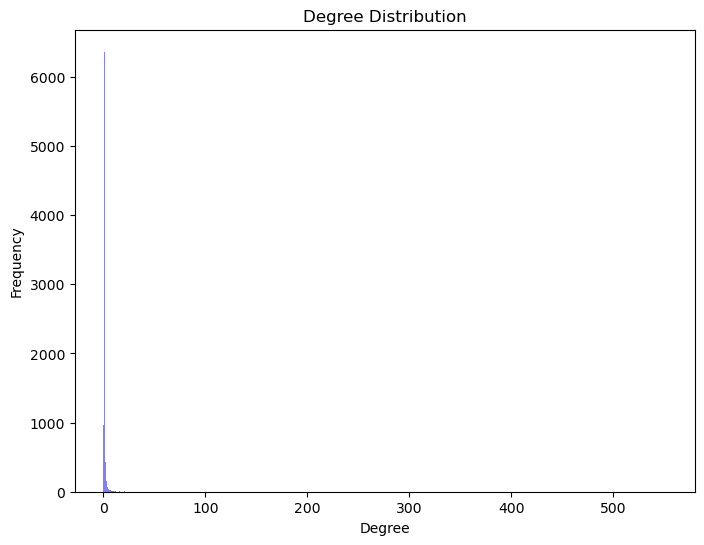

In [62]:
# Plot the degree distribution of the network
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

plt.figure(figsize=(8, 6))
plt.bar(degrees, degree_count, align='center', color='blue', alpha=0.5)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [ ]:
Degree Distribution for our Network

It is hard to visualize though, so we will have to adjust the scale of the axis.


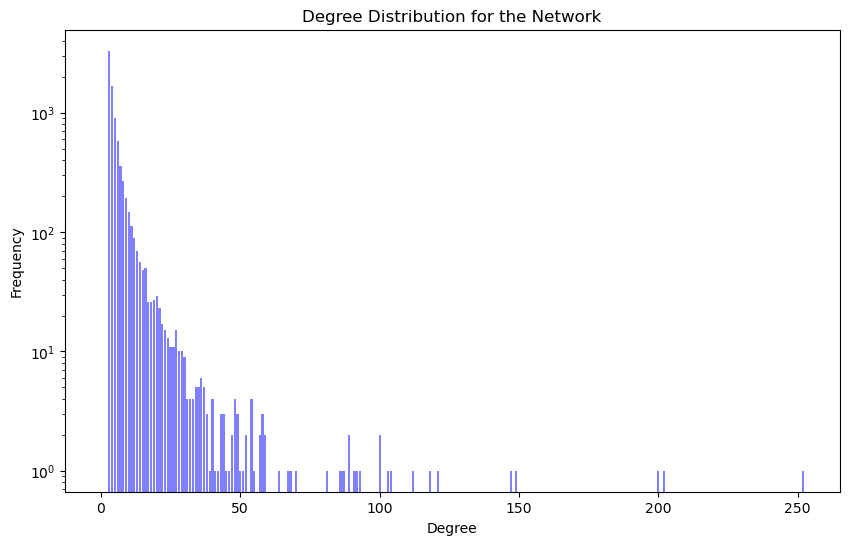

In [66]:
# Plot the degree distribution of the network
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_count, align='center', color='blue', alpha=0.5)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution for the Network')
plt.yscale('log')
plt.show()

In [ ]:
Degree Distribution of our Network 

We have compressed the y-axis so that it will be easier to see the middle values.


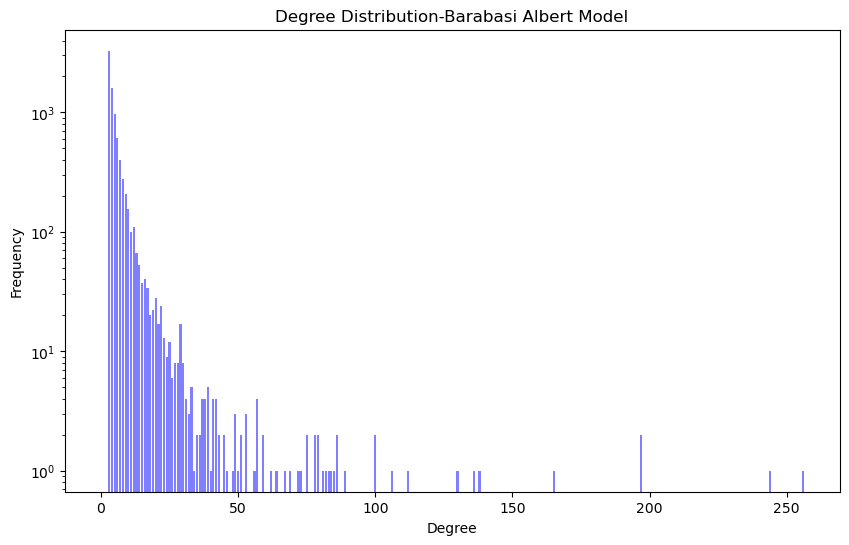

In [68]:
# Generate a Barabasi-Albert graph with 8215 nodes and 6721 edges
G = nx.barabasi_albert_graph(8215, 3)

# Get the degree sequence and histogram
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_count, align='center', color='blue', alpha=0.5)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution-Barabasi Albert Model')
plt.yscale('log')
plt.show()

In [ ]:
Degree Distribution for Barabasi-Albert Model

Notice that we also adjusted the y-axis scales to a logaritmic one as previously.


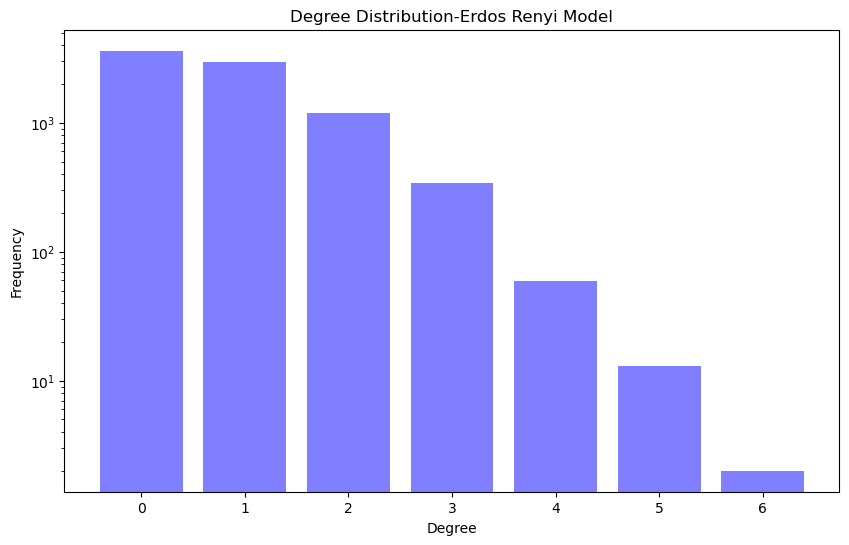

In [71]:
# Generate the Erdos Reyni graph
n = 8215
m = 6721
G = nx.erdos_renyi_graph(n, m/(n*(n-1)))

# Plot the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_count, align='center', color='blue', alpha=0.5)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution-Erdos Renyi Model')
plt.yscale('log')
plt.show()

In [ ]:
Degree Distribution for Erdos Renyi Model


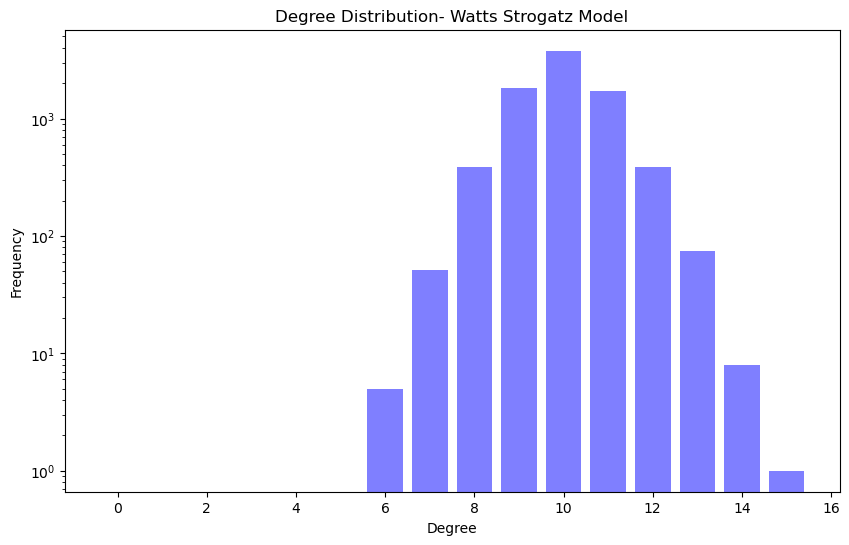

In [84]:
# Generate a Watts-Strogatz model graph
n = 8215
k = 10
p = 0.1
G = nx.watts_strogatz_graph(n, k, p)

# Plot the degree distribution of the network
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_count, align='center', color='blue', alpha=0.5)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution- Watts Strogatz Model')
plt.yscale('log')
plt.show()

In [ ]:
Degree Distribution for Watts Strogatz Model


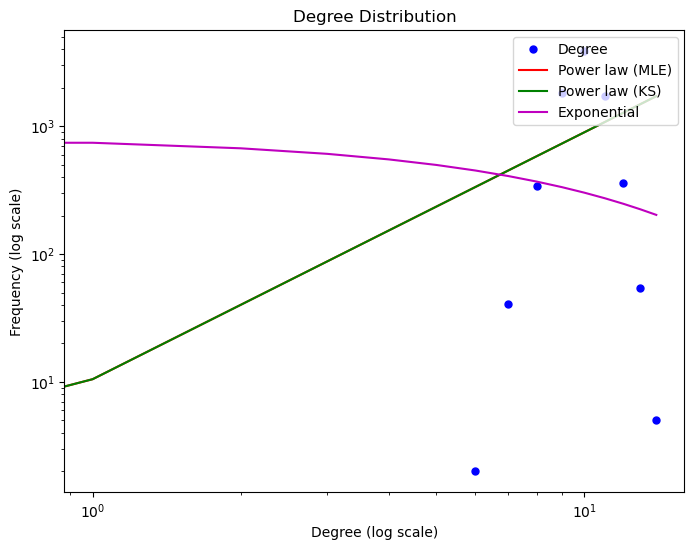

In [81]:
# Calculating the in-degree and out-degree distributions
degrees = [d for n, d in G.degree()]

# Plotting the degree distribution
degree_count = np.bincount(degrees)
degree = range(len(degree_count))
plt.figure(figsize=(8, 6))
plt.loglog(degree, degree_count, 'bo', markersize=5, label='Degree')

# Fitting power-law model using MLE
fit = st.powerlaw.fit(degrees, floc=0)
pdf = st.powerlaw.pdf(degree, fit[0], loc=fit[1], scale=fit[2])
plt.loglog(degree, pdf*sum(degree_count), 'r-', label='Power law (MLE)')

# Fitting power-law model using KS-test
fit = st.powerlaw.fit(degrees, method='KS', floc=0)
pdf = st.powerlaw.pdf(degree, fit[0], loc=fit[1], scale=fit[2])
plt.loglog(degree, pdf*sum(degree_count), 'g-', label='Power law (KS)')

# Fitting exponential model
fit = st.expon.fit(degrees, floc=0)
pdf = st.expon.pdf(degree, loc=fit[0], scale=fit[1])
plt.loglog(degree, pdf*sum(degree_count), 'm-', label='Exponential')

plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution')
plt.legend(loc='upper right')

In [ ]:
We fit different models to the degree distribution of our network

First we calculated the degree sequence of G and then plotted the degree distribution using a histogram with logarithmic bins.
After that we fit different models to the degree distribution using regression, maximum likelihood estimation(MLE)

C:\Anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:7379: RuntimeWarning: divide by zero encountered in log
  return -len(data) / np.sum(np.log((data - loc)/scale))
C:\Anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:7441: RuntimeWarning: overflow encountered in divide
  return (shape - 1) * np.sum(1 / (loc - data))  # -1/(data-loc)


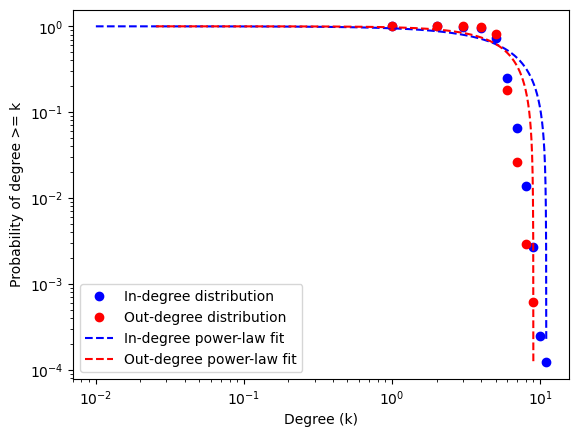

In [83]:
in_degrees = {}
out_degrees = {}

for node in G.nodes():
    # Compute in-degree
    in_degree = 0
    for edge in G.edges():
        if edge[1] == node:
            in_degree += 1
    in_degrees[node] = in_degree
    
    # Compute out-degree
    out_degree = 0
    for edge in G.edges():
        if edge[0] == node:
            out_degree += 1
    out_degrees[node] = out_degree
    
# Convert dictionaries to lists of degrees
in_degrees = list(in_degrees.values())
out_degrees = list(out_degrees.values())


# Convert the lists to arrays
in_degrees_array = np.array(in_degrees)
out_degrees_array = np.array(out_degrees)



# Get the in-degree and out-degree distributions
#in_degrees = np.array(list(dict(G.in_degree()).values()))
#out_degrees = np.array(list(dict(G.out_degree()).values()))

# Fit power-law distributions to the degree distributions
in_params = st.powerlaw.fit(in_degrees_array)
out_params = st.powerlaw.fit(out_degrees_array)

# Generate samples from the fitted distributions
in_samples = st.powerlaw.rvs(*in_params, size=len(in_degrees_array))
out_samples = st.powerlaw.rvs(*out_params, size=len(out_degrees_array))

# Calculate the probability-degree plots for the degree distributions and fitted distributions
in_prob_degrees = np.array([(np.sum(in_degrees_array>=k)/len(in_degrees_array), k) for k in sorted(set(in_degrees_array), reverse=True)])
out_prob_degrees = np.array([(np.sum(out_degrees_array>=k)/len(out_degrees_array), k) for k in sorted(set(out_degrees_array), reverse=True)])
in_fit_prob_degrees = np.array([(st.powerlaw.sf(k, *in_params), k) for k in sorted(set(in_samples), reverse=True)])
out_fit_prob_degrees = np.array([(st.powerlaw.sf(k, *out_params), k) for k in sorted(set(out_samples), reverse=True)])

# Plot the probability-degree plots for the degree distributions and fitted distributions
fig, ax = plt.subplots()
ax.loglog(in_prob_degrees[:,1], in_prob_degrees[:,0], 'bo', label='In-degree distribution')
ax.loglog(out_prob_degrees[:,1], out_prob_degrees[:,0], 'ro', label='Out-degree distribution')
ax.loglog(in_fit_prob_degrees[:,1], in_fit_prob_degrees[:,0], 'b--', label='In-degree power-law fit')
ax.loglog(out_fit_prob_degrees[:,1], out_fit_prob_degrees[:,0], 'r--', label='Out-degree power-law fit')
ax.set_xlabel('Degree (k)')
ax.set_ylabel('Probability of degree >= k')
ax.legend()
plt.show()